In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import nltk
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk import sent_tokenize, word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import string
from PIL import Image
import requests
from os import path, getcwd

### Reading the Review Data Set

In [3]:
yelp_review = pd.read_csv('/Users/ambu/Desktop/DataScience/CapstoneProject/final_kaggle/reviews_reduced.csv')
yelp_review.head()

Unnamed: 0 Unnamed: 0.1             business_id cool                 date  \
0           0            0  ujmEBvifdJM6h6RLv4wQIg    0  2013-05-07 04:34:36   
1           4            4  b1b1eb3uo-w561D0ZfCEiQ    0  2018-01-30 23:07:38   
2           6            6  3fw2X5bZYeW9xCz_zGhOHg    5  2016-05-07 01:21:02   
3          21           21  Mem13A3C202RzT53npn4NA    9  2017-05-13 10:41:43   
4          25           25  FQ1wBQb3aNeRMThSQEV0Qg    0  2013-12-07 02:32:45   

   funny               review_id  stars  \
0    1.0  Q1sbwvVQXV2734tPgoKj4Q    1.0   
1    0.0  11a8sVPMUFtaC7_ABRkmtw    1.0   
2    4.0  G7XHMxG0bx9oBJNECG4IFg    3.0   
3    6.0  IPw8yWiyqnfBzzWmypUHgg    5.0   
4    0.0  I9HBDyzCqLhTYHCAZIFZQQ    5.0   

                                                text  useful  \
0  Total bill for this horrible service? Over $8G...     6.0   
1  Today was my second out of three sessions I ha...     7.0   
2  Tracy dessert had a big name in Hong Kong and ...     5.0   
3  If you are looking for the best pierogies in P...     9.0   
4  PlumbSmart provided superior service from begi...     4.0   

                  user_id  
0  hG7b0MtEbXx5QzbzE6C_VA  
1  ssoyf2_x0EQMed6fgHeMyQ  
2  jlu4CztcSxrKx56ba1a5AQ  
3  5JVY32_bmTBfIGpCCsnAfw  
4  vXZeHaLvdfCPATz5BDavow

In [4]:
yelp_review.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1, inplace = True)

#### Obtaining the shape of the data

In [5]:
yelp_review.shape

(665971, 9)

In [6]:
yelp_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665971 entries, 0 to 665970
Data columns (total 9 columns):
business_id    665971 non-null object
cool           665971 non-null object
date           665969 non-null object
funny          665969 non-null float64
review_id      665969 non-null object
stars          665969 non-null float64
text           665968 non-null object
useful         665967 non-null float64
user_id        665967 non-null object
dtypes: float64(3), object(6)
memory usage: 45.7+ MB


In [7]:
yelp_review.isnull().sum()

business_id    0
cool           0
date           2
funny          2
review_id      2
stars          2
text           3
useful         4
user_id        4
dtype: int64

In [8]:
yelp_review.useful.sort_values(ascending = False).head(20)

121055    1241.0
129494    1122.0
132543     970.0
130694     846.0
130432     808.0
115698     781.0
127834     694.0
120856     668.0
78674      650.0
128171     578.0
104885     539.0
131061     538.0
387233     526.0
106896     514.0
109932     509.0
102079     507.0
103798     500.0
127092     498.0
124442     467.0
264869     450.0
Name: useful, dtype: float64

#### Distribution of Review counts

In [9]:
Cust = []
for i in yelp_review['stars']:
    if (i >= 4):
        Cust.append('Good')
    elif (i <= 2):
        Cust.append('Bad')
    else:
        Cust.append('Neutral')

yelp_review['CustomerEXP'] = Cust

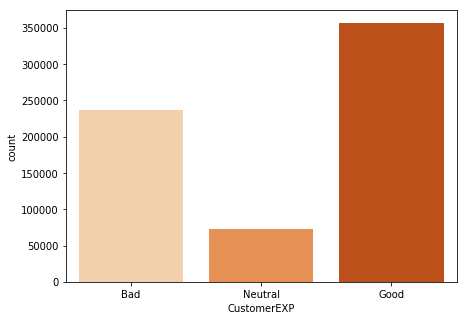

In [10]:
plt.figure(figsize = (7,5))
sns.countplot('CustomerEXP', data = yelp_review, palette="Oranges")

In [11]:
yelp_review.CustomerEXP.value_counts()

Good       356569
Bad        236886
Neutral     72516
Name: CustomerEXP, dtype: int64

#### WordCloud for Reviews

In [12]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['one','also','ive'])
stemmer = nltk.stem.PorterStemmer()
def clean_sentence(text):
    nopunc = [i for i in text if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split() 
    words_clean = [words for words in nn if words not in stopwords]
    return (words_clean)

In [13]:
good = yelp_review[yelp_review['CustomerEXP'] == 'Good']
bad = yelp_review[yelp_review['CustomerEXP'] == 'Bad']
neu = yelp_review[yelp_review['CustomerEXP'] == 'Neutral']

In [14]:
good_docs = good['text'].str.lower().str.replace('[^A-Za-z ]','')
bad_docs = bad['text'].str.lower().str.replace('[^A-Za-z ]','')
neu_docs = neu['text'].str.lower().str.replace('[^A-Za-z ]','')

In [15]:
good_bow = clean_sentence(str(good_docs))

In [16]:
bad_bow = clean_sentence(str(bad_docs))

In [17]:
neu_bow = clean_sentence(str(neu_docs))

In [18]:
good_para = ' '.join(good_bow)
bad_para = ' '.join(bad_bow)
new_para = ' '.join(neu_bow)

#### Positive Reviews WordCloud

In [19]:
d = getcwd()
thumbsup = np.array(Image.open(path.join(d,"thumbsup.png")))

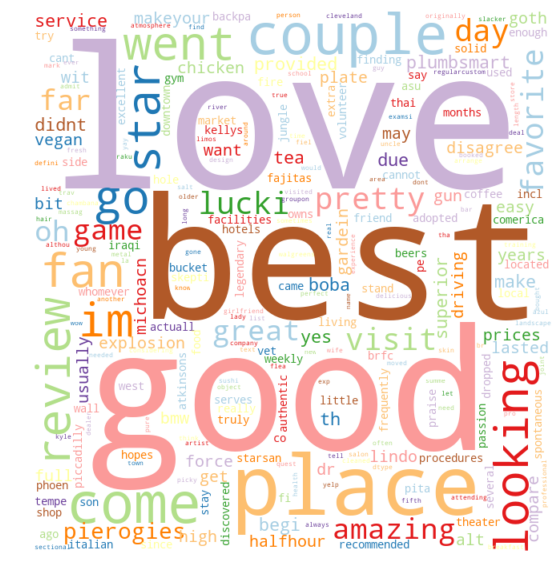

In [20]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("good.png")

#### Negative Reviews WordCloud

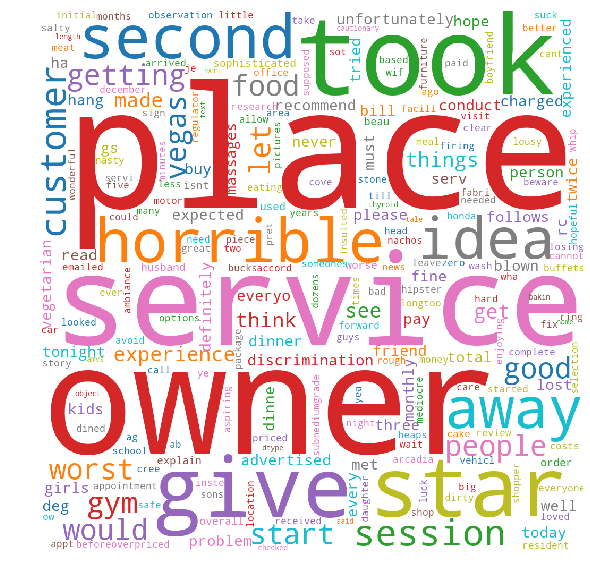

In [21]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('bad.png')

#### Netural Reviews WordCloud

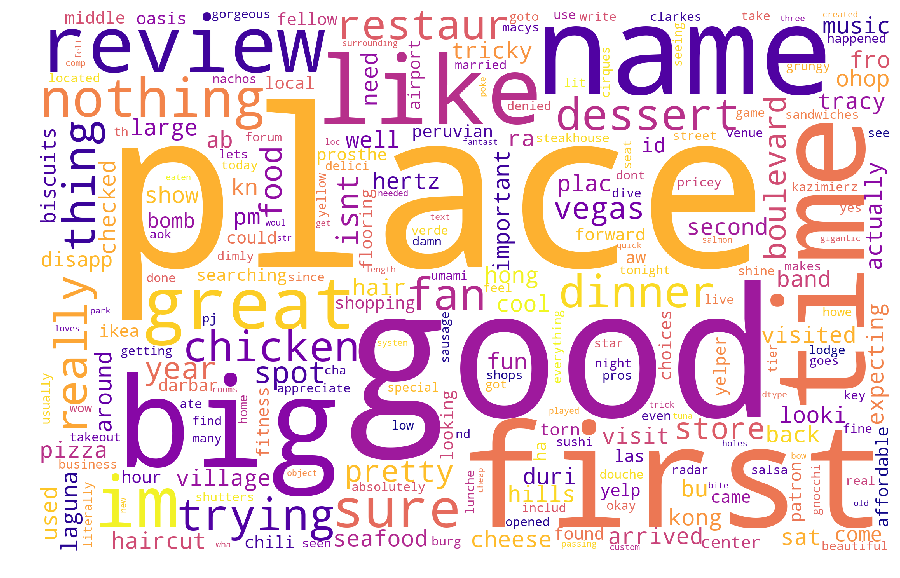

In [22]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('neu.png')

### Reading the USERS Data Set

In [23]:
yelp_users = pd.read_csv('/Users/ambu/Desktop/DataScience/CapstoneProject/final_kaggle/yelp_user.csv')
yelp_users.head()

Unnamed: 0  average_stars  compliment_cool  compliment_cute  \
0           0           4.03                1                0   
1           1           3.63                1                0   
2           2           3.71                0                0   
3           3           4.85                0                0   
4           4           4.08               80                0   

   compliment_funny  compliment_hot  compliment_list  compliment_more  \
0                 1               2                0                0   
1                 1               1                0                0   
2                 0               0                0                0   
3                 0               1                0                0   
4                80              28                1                1   

   compliment_note  compliment_photos  ...  cool                elite  fans  \
0                1                  0  ...    25       2015,2016,2017     5   
1                0                  0  ...    16                  NaN     4   
2                1                  0  ...    10                  NaN     0   
3                0                  0  ...    14                  NaN     5   
4               16                  5  ...   665  2015,2016,2017,2018    39   

                                             friends funny    name  \
0  c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...    17  Rashmi   
1  kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...    22   Jenna   
2  4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...     8   David   
3  RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...     4  Angela   
4  mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...   279   Nancy   

  review_count  useful                 user_id        yelping_since  
0           95      84  l6BmjZMeQD3rDxWUbiAiow  2013-10-08 23:11:33  
1           33      48  4XChL029mKr5hydo79Ljxg  2013-02-21 22:29:06  
2           16      28  bc8C_eETBWL0olvFSJJd0w  2013-10-04 00:16:10  
3           17      30  dD0gZpBctWGdWo9WlGuhlA  2014-05-22 15:57:30  
4          361    1114  MM4RJAeH6yuaN8oZDSt0RA  2013-10-23 07:02:50  

[5 rows x 23 columns]

In [24]:
yelp_users.drop('Unnamed: 0', axis = 1, inplace = True)

In [25]:
yelp_users.shape

(1637138, 22)

In [26]:
yelp_users.isnull().sum()

average_stars               0
compliment_cool             0
compliment_cute             0
compliment_funny            0
compliment_hot              0
compliment_list             0
compliment_more             0
compliment_note             0
compliment_photos           0
compliment_plain            0
compliment_profile          0
compliment_writer           0
cool                        0
elite                 1565761
fans                        0
friends                     0
funny                       0
name                        3
review_count                0
useful                      0
user_id                     0
yelping_since               0
dtype: int64

### Reading the Business Data Set

In [27]:
yelp_business = pd.read_csv('/Users/ambu/Desktop/DataScience/CapstoneProject/final_kaggle/yelp_business.csv')
yelp_business.head()

Unnamed: 0                         address  \
0           0     2818 E Camino Acequia Drive   
1           1            30 Eglinton Avenue W   
2           2       10110 Johnston Rd, Ste 15   
3           3   15655 W Roosevelt St, Ste 237   
4           4  4209 Stuart Andrew Blvd, Ste F   

                                          attributes             business_id  \
0                           {'GoodForKids': 'False'}  1SWheh84yJXfytovILXOAQ   
1  {'RestaurantsReservations': 'True', 'GoodForMe...  QXAEGFB4oINsVuTFxEYKFQ   
2  {'GoodForKids': 'True', 'NoiseLevel': "u'avera...  gnKjwL_1w79qoiV3IC_xQQ   
3                                                NaN  xvX2CttrVhyG2z1dFg_0xw   
4  {'BusinessAcceptsBitcoin': 'False', 'ByAppoint...  HhyxOkGAM07SRYtlQ4wMFQ   

                                          categories         city  \
0                                  Golf, Active Life      Phoenix   
1  Specialty Food, Restaurants, Dim Sum, Imported...  Mississauga   
2                  Sushi Bars, Restaurants, Japanese    Charlotte   
3                      Insurance, Financial Services     Goodyear   
4  Plumbing, Shopping, Local Services, Home Servi...    Charlotte   

                                               hours  is_open   latitude  \
0                                                NaN        0  33.522143   
1  {'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...        1  43.605499   
2  {'Monday': '17:30-21:30', 'Wednesday': '17:30-...        1  35.092564   
3  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...        1  33.455613   
4  {'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...        1  35.190012   

    longitude                             name postal_code  review_count  \
0 -112.018481       Arizona Biltmore Golf Club       85016             5   
1  -79.652289       Emerald Chinese Restaurant     L5R 3E7           128   
2  -80.859132      Musashi Japanese Restaurant       28210           170   
3 -112.395596  Farmers Insurance - Paul Lorenz       85338             3   
4  -80.887223              Queen City Plumbing       28217             4   

   stars state  
0    3.0    AZ  
1    2.5    ON  
2    4.0    NC  
3    5.0    AZ  
4    4.0    NC

In [28]:
yelp_business.drop('Unnamed: 0', axis = 1, inplace = True)

In [29]:
yelp_business.shape

(192609, 14)

In [30]:
yelp_business.isnull().sum()

address          7682
attributes      28836
business_id         0
categories        482
city                1
hours           44830
is_open             0
latitude            0
longitude           0
name                0
postal_code       659
review_count        0
stars               0
state               0
dtype: int64

#### Converting the category column in the buisness data set to string

In [31]:
yelp_business['categories'] = yelp_business['categories'].astype('str')

In [32]:
yelp_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         184927 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192609 non-null object
city            192608 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     191950 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


#### Splitting the categories in the buisness data set

In [33]:
cat = []
for x in yelp_business.categories:
    if  'pets' in x.lower():
        cat.append('Pets')
    elif  'religious' in x.lower():
        cat.append('Religious Org')
    elif  'school' in x.lower() or 'schools' in x.lower() or 'university' in x.lower() or 'education' in x.lower():
        cat.append('Education')
    elif  'gym' in x.lower() or 'fitness' in x.lower() or 'yoga' in x.lower() or 'trainers' in x.lower() or 'active life' in x.lower():
        cat.append('Fitness')
    elif  'bars' in x.lower() or 'nightlife' in x.lower() or 'entertainment' in x.lower() or 'wine' in x.lower()  or 'beer' in x.lower():
        cat.append('Bars')
    elif 'restaurants' in x.lower() or'smoothies' in x.lower() or'bakeries' in x.lower() or 'food' in x.lower() or 'coffee' in x.lower():
        cat.append('Restaurant')
    elif  'clothing' in x.lower() or'shopping' in x.lower() or 'books' in x.lower() or'grocery' in x.lower() or 'store' in x.lower():
        cat. append('Shopping')
    elif 'automotive' in x.lower():
        cat.append('Automotive')
    elif 'spa' in x.lower() or 'Salons' in x.lower() or 'massage' in x.lower() or 'beauty' in x.lower():
        cat.append('Spa')
    elif 'service' in x.lower() or 'services' in x.lower()  or 'event' in x.lower():
        cat.append('Service')
    elif 'parks' in x.lower() or  'lakes' in x.lower() or 'zoo' in x.lower() or 'pools' in x.lower():
        cat.append('Parks')
    elif 'travel' in x.lower():
        cat.append('Travel')
    elif 'Medical' in x.lower() or 'health' in x.lower():
        cat.append('Medical')


    else:
        cat.append('Others')

In [34]:
yelp_business['cat_desc'] = cat

In [35]:
yelp_business.head()

address  \
0     2818 E Camino Acequia Drive   
1            30 Eglinton Avenue W   
2       10110 Johnston Rd, Ste 15   
3   15655 W Roosevelt St, Ste 237   
4  4209 Stuart Andrew Blvd, Ste F   

                                          attributes             business_id  \
0                           {'GoodForKids': 'False'}  1SWheh84yJXfytovILXOAQ   
1  {'RestaurantsReservations': 'True', 'GoodForMe...  QXAEGFB4oINsVuTFxEYKFQ   
2  {'GoodForKids': 'True', 'NoiseLevel': "u'avera...  gnKjwL_1w79qoiV3IC_xQQ   
3                                                NaN  xvX2CttrVhyG2z1dFg_0xw   
4  {'BusinessAcceptsBitcoin': 'False', 'ByAppoint...  HhyxOkGAM07SRYtlQ4wMFQ   

                                          categories         city  \
0                                  Golf, Active Life      Phoenix   
1  Specialty Food, Restaurants, Dim Sum, Imported...  Mississauga   
2                  Sushi Bars, Restaurants, Japanese    Charlotte   
3                      Insurance, Financial Services     Goodyear   
4  Plumbing, Shopping, Local Services, Home Servi...    Charlotte   

                                               hours  is_open   latitude  \
0                                                NaN        0  33.522143   
1  {'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...        1  43.605499   
2  {'Monday': '17:30-21:30', 'Wednesday': '17:30-...        1  35.092564   
3  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...        1  33.455613   
4  {'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...        1  35.190012   

    longitude                             name postal_code  review_count  \
0 -112.018481       Arizona Biltmore Golf Club       85016             5   
1  -79.652289       Emerald Chinese Restaurant     L5R 3E7           128   
2  -80.859132      Musashi Japanese Restaurant       28210           170   
3 -112.395596  Farmers Insurance - Paul Lorenz       85338             3   
4  -80.887223              Queen City Plumbing       28217             4   

   stars state    cat_desc  
0    3.0    AZ     Fitness  
1    2.5    ON  Restaurant  
2    4.0    NC        Bars  
3    5.0    AZ     Service  
4    4.0    NC    Shopping

In [36]:
yelp_business.cat_desc.value_counts().sort_values(ascending = False)

Restaurant       59396
Service          28905
Shopping         25929
Bars             21033
Spa              17270
Automotive       11365
Medical           9819
Fitness           8669
Pets              4111
Education         3319
Travel            1498
Others             688
Religious Org      580
Parks               27
Name: cat_desc, dtype: int64

#### Dsitribution of Ratings

In [37]:
x_bus = yelp_business['stars'].value_counts().index
y_bus = yelp_business['stars'].value_counts().values

Text(0.5, 0, 'Ratings ')

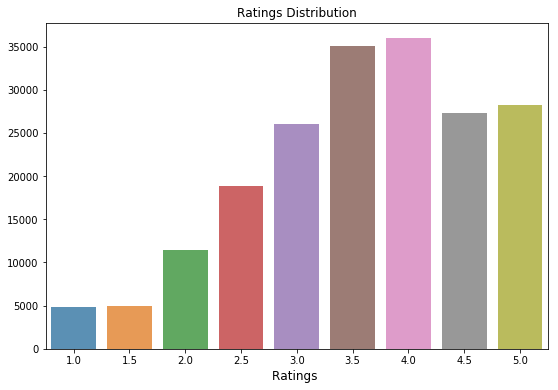

In [38]:
plt.figure(figsize=(9,6))
ax= sns.barplot(x_bus, y_bus, data= yelp_business ,alpha=0.8 )
plt.title("Ratings Distribution")
plt.xlabel('Ratings ', fontsize=12)

#### Distribution of Review counts with Ratings 

Text(0.5, 0, 'Ratings ')

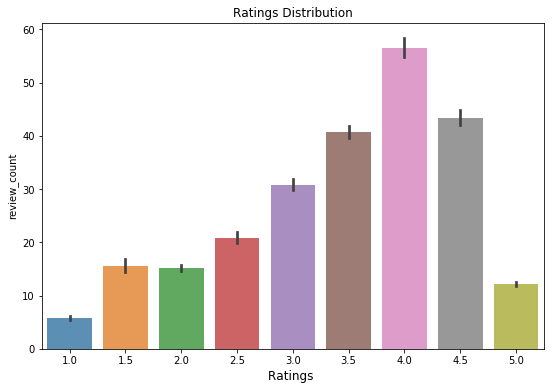

In [39]:
plt.figure(figsize=(9,6))
ax= sns.barplot(x = 'stars', y = 'review_count',data= yelp_business ,alpha=0.8 )
plt.title("Ratings Distribution")
plt.xlabel('Ratings ', fontsize=12)

#### Types of Business

In [40]:
business_cat=yelp_business['cat_desc']
categry=pd.DataFrame(business_cat,columns=['cat_desc'])
x_cat = categry.cat_desc.value_counts()
x_cat = x_cat.sort_values(ascending=False)
x_cat = x_cat.iloc[0:20]

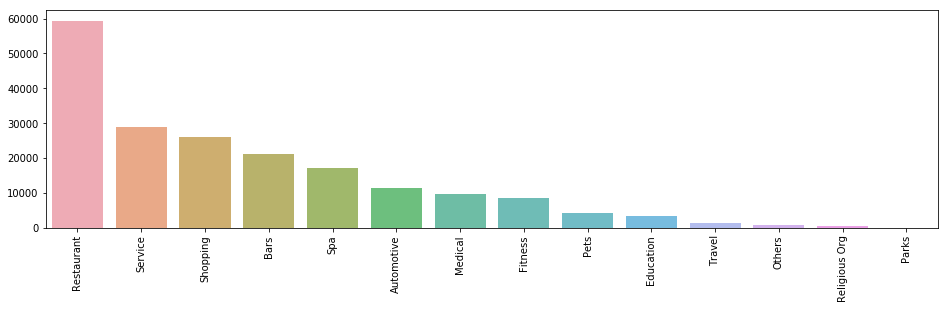

In [41]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x_cat.index, x_cat.values, alpha=0.8)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

#### Cities with most Business

In [42]:
x_busci = yelp_business['city'].value_counts().sort_values(ascending = False)
x_busci = x_busci.iloc[0:25]

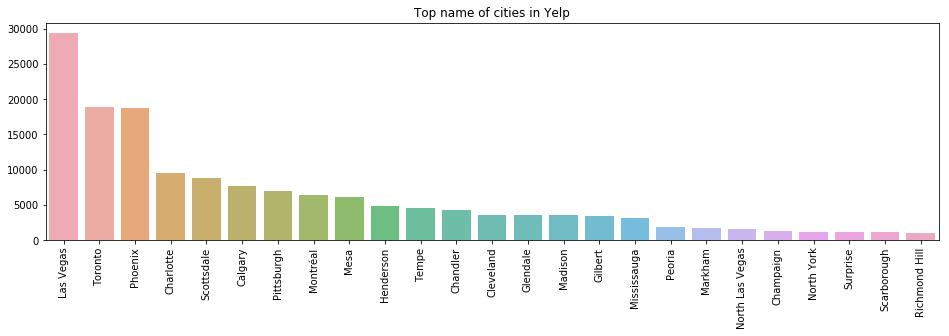

In [43]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x_busci.index, x_busci.values, alpha=0.8)
ax.set_xlabel('')
ax.set_title('Top name of cities in Yelp')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

#### Most Reviewed Business

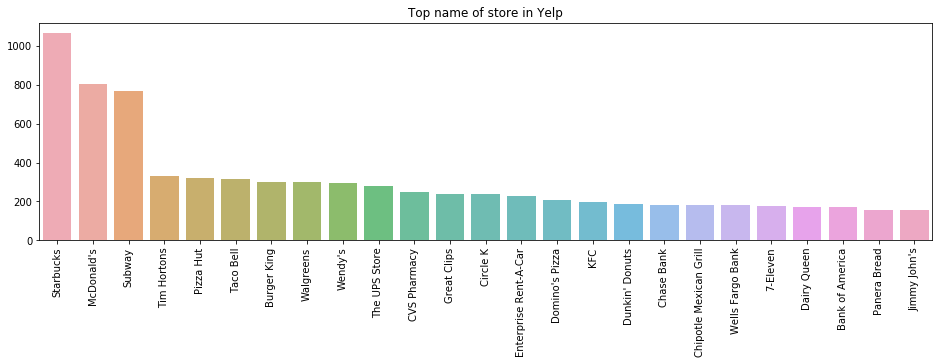

In [44]:
x_bunm = yelp_business['name'].value_counts().sort_values(ascending = False)
x_bunm = x_bunm.iloc[0:25]
plt.figure(figsize=(16,4))
ax = sns.barplot(x_bunm.index, x_bunm.values, alpha=0.8)
ax.set_xlabel('')
ax.set_title('Top name of store in Yelp')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

Number of city listed 1203


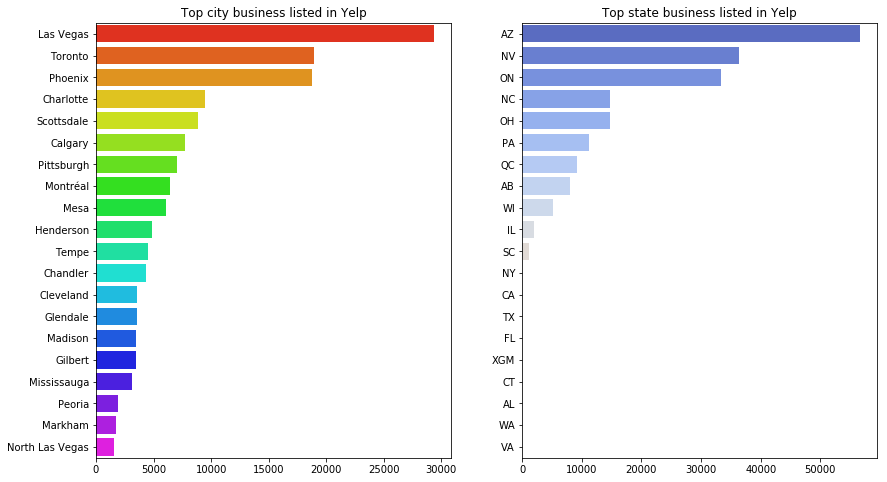

In [45]:
print('Number of city listed',yelp_business['city'].nunique())
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = yelp_business['city'].value_counts()[:20].to_frame()

sns.barplot(cnt['city'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top city business listed in Yelp')

cnt = yelp_business['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top state business listed in Yelp');

#### Top reviews

Median review count 9.0


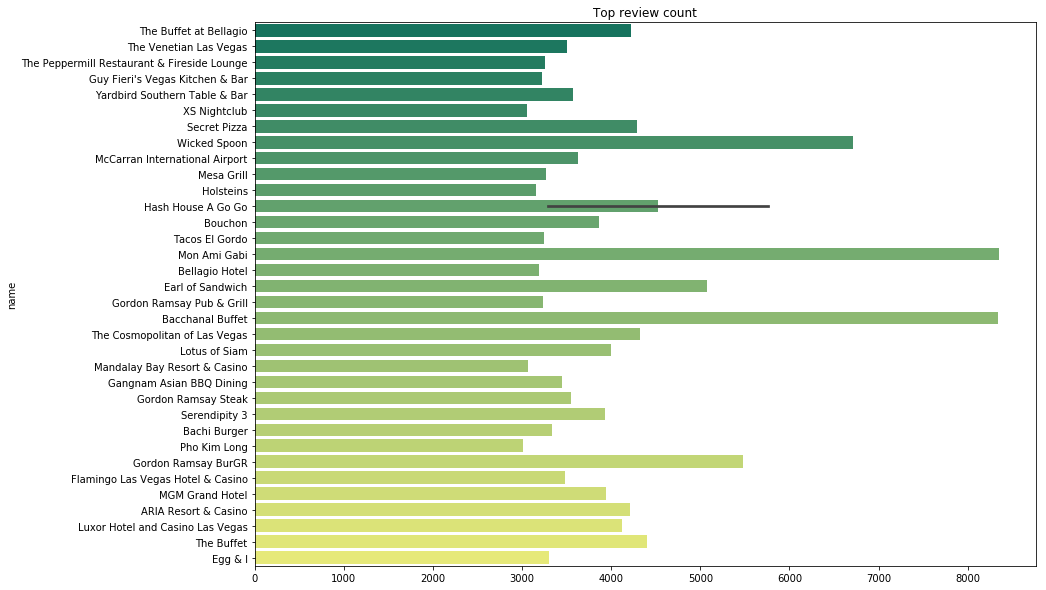

In [46]:
print('Median review count',yelp_business['review_count'].median())
plt.figure(figsize = (14,10))
sns.barplot(yelp_business[yelp_business['review_count'] >3000]['review_count'].sort_values(ascending = False),
            yelp_business[yelp_business['review_count'] >3000]['name'],
           palette = 'summer')
plt.xlabel('')
plt.title('Top review count');

#### Business is open

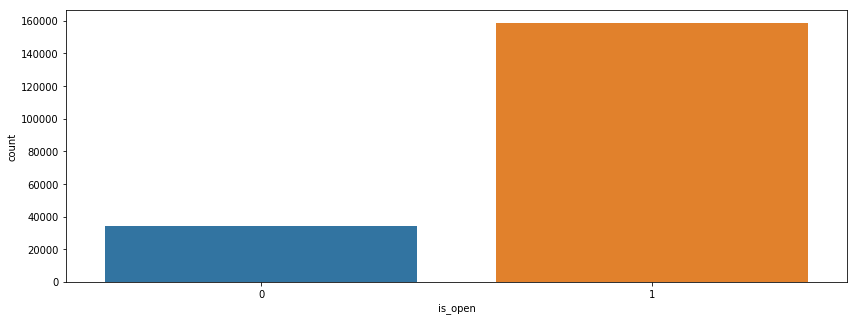

In [47]:
plt.figure(figsize=(14,5))
sns.countplot(yelp_business['is_open'])

#### Business Category wordcloud

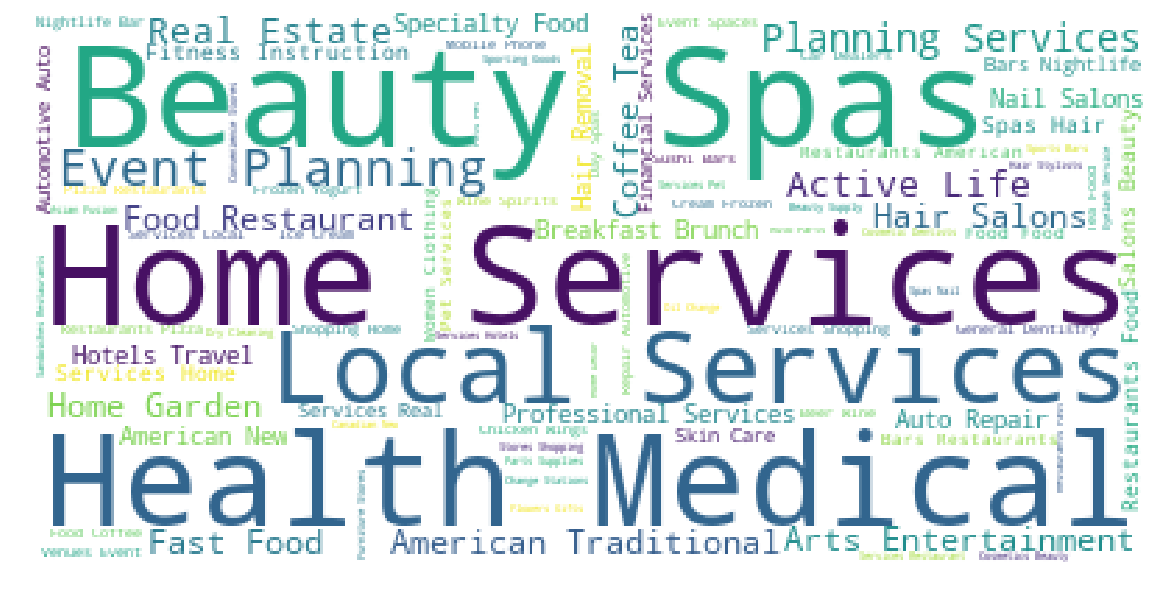

In [48]:
cloud = WordCloud(background_color = 'white',
                  max_words= 1000).generate(' '.join(yelp_business['categories'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

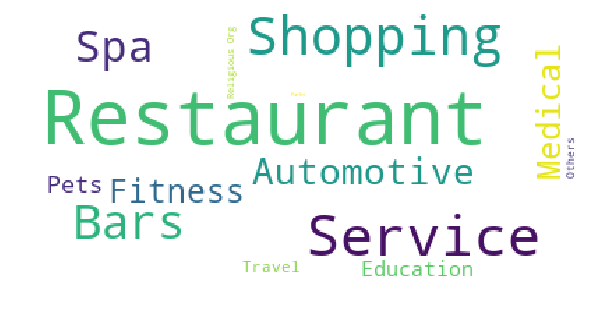

In [49]:
cloud = WordCloud(background_color = 'white',
                  max_words= 1000).generate(' '.join(yelp_business['cat_desc'].astype(str)))
plt.figure(figsize=(10, 8))
plt.imshow(cloud)
plt.axis('off');

### Reading the Checkin Data Set

In [50]:
yelp_checkin = pd.read_csv('/Users/ambu/Desktop/DataScience/CapstoneProject/final_kaggle/yelp_checkin.csv')
yelp_checkin.head()

Unnamed: 0             business_id  \
0           0  --1UhMGODdWsrMastO9DZw   
1           1  --6MefnULPED_I942VcFNA   
2           2  --7zmmkVg-IMGaXbuVd0SQ   
3           3  --8LPVSo5i0Oo61X01sV9A   
4           4  --9QQLMTbFzLJ_oT-ON3Xw   

                                                date  
0  2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016...  
1  2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012...  
2  2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015...  
3                                2016-07-08 16:43:30  
4  2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010...

In [51]:
yelp_checkin.drop('Unnamed: 0', axis = 1, inplace = True)

In [52]:
yelp_checkin.shape

(161950, 2)

In [53]:
datelist=[]
for i in range(len(yelp_checkin)):
    datelist.append(yelp_checkin.date[i].split(', '))

In [54]:
dateli = []
timeli = []
for i in datelist:
    for j in i:
        temp=pd.datetime.strptime(j, '%Y-%m-%d %H:%M:%S')
        dateli.append(temp.date())
        timeli.append(temp.time())

In [55]:
checkin_dati = pd.DataFrame({'Date': dateli, 'Time': timeli})
checkin_dati.head()

Date      Time
0  2016-04-26  19:49:16
1  2016-08-30  18:36:57
2  2016-10-15  02:45:18
3  2016-11-18  01:54:50
4  2017-04-20  18:39:06

In [56]:
yelp_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161950 entries, 0 to 161949
Data columns (total 2 columns):
business_id    161950 non-null object
date           161950 non-null object
dtypes: object(2)
memory usage: 2.5+ MB


In [57]:
yelp_checkin.isnull().sum()

business_id    0
date           0
dtype: int64

### Reading the Tip Data Set

In [58]:
yelp_tip = pd.read_csv('/Users/ambu/Desktop/DataScience/CapstoneProject/final_kaggle/yelp_tip.csv')
yelp_tip.head()

Unnamed: 0             business_id  compliment_count                 date  \
0           0  VaKXUpmWTTWDKbpJ3aQdMw                 0  2014-03-27 03:51:24   
1           1  OPiPeoJiv92rENwbq76orA                 0  2013-05-25 06:00:56   
2           2  5KheTjYPu1HcQzQFtm4_vw                 0  2011-12-26 01:46:17   
3           3  TkoyGi8J7YFjA6SbaRzrxg                 0  2014-03-23 21:32:49   
4           4  AkL6Ous6A1atZejfZXn1Bg                 0  2012-10-06 00:19:27   

                                                text                 user_id  
0  Great for watching games, ufc, and whatever el...  UPw5DWs_b-e2JRBS-t37Ag  
1  Happy Hour 2-4 daily with 1/2 price drinks and...  Ocha4kZBHb4JK0lOWvE0sg  
2  Good chips and salsa. Loud at times. Good serv...  jRyO2V1pA4CdVVqCIOPc1Q  
3  The setting and decoration here is amazing. Co...  FuTJWFYm4UKqewaosss1KA  
4  Molly is definately taking a picture with Sant...  LUlKtaM3nXd-E4N4uOk_fQ

In [59]:
yelp_tip.drop('Unnamed: 0', axis = 1, inplace = True)

In [60]:
yelp_tip.shape

(1223094, 5)

In [61]:
yelp_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223094 entries, 0 to 1223093
Data columns (total 5 columns):
business_id         1223094 non-null object
compliment_count    1223094 non-null int64
date                1223094 non-null object
text                1223090 non-null object
user_id             1223094 non-null object
dtypes: int64(1), object(4)
memory usage: 46.7+ MB


In [62]:
yelp_tip.isnull().sum()

business_id         0
compliment_count    0
date                0
text                4
user_id             0
dtype: int64

#### Tips Wordcloud

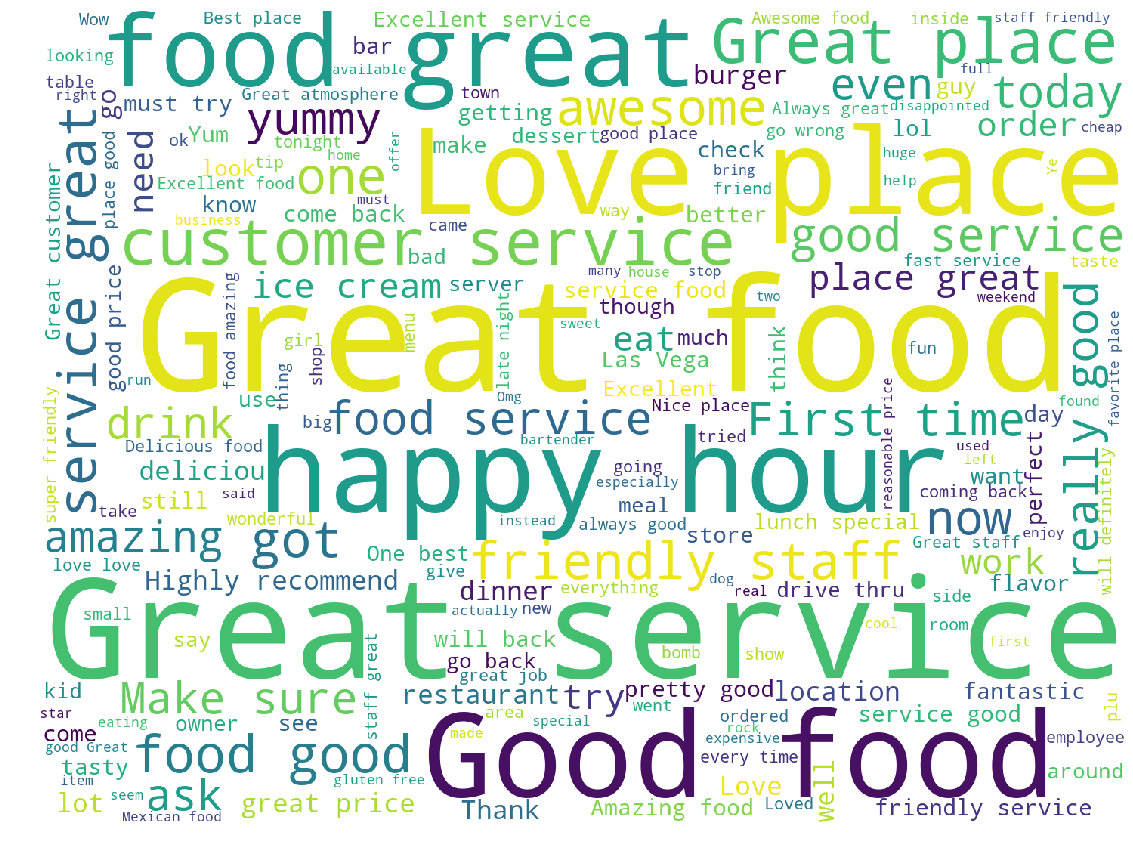

In [63]:
cloud = WordCloud(background_color = 'white', 
                  width=1440, height= 1080,max_words= 200).generate(' '.join(yelp_tip['text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

#### Tips Text Feature

In [64]:
yelp_tip['num_words'] = yelp_tip['text'].str.len()
yelp_tip['num_uniq_words'] = yelp_tip['text'].apply(lambda x: len(set(str(x).split())))
yelp_tip['num_chars'] = yelp_tip['text'].apply(lambda x: len(str(x)))
yelp_tip['num_stopwords'] = yelp_tip['text'].apply(lambda x: len([w for w in str(x).lower().split() 
                                                      if w in set(stopwords)]))

Text(0.5, 1.0, 'Distribution of Stop words')

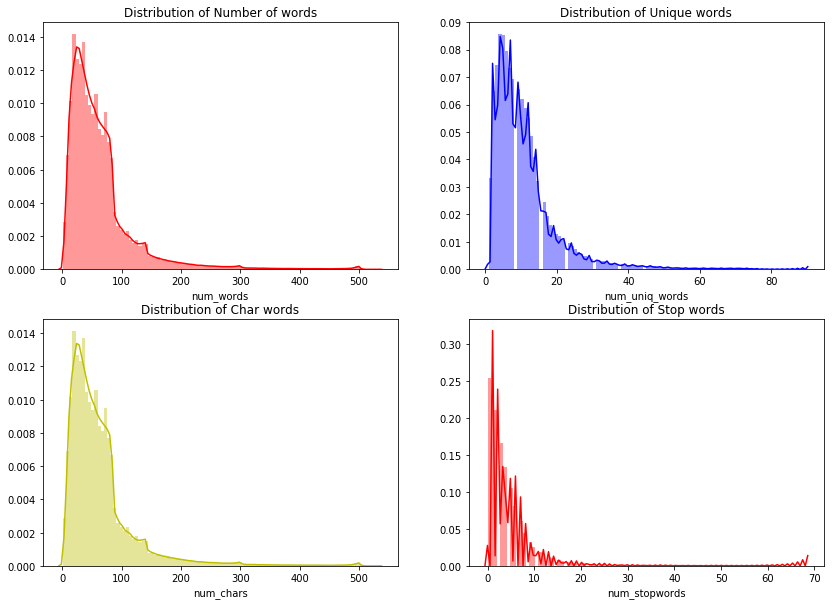

In [65]:
f, ax = plt.subplots(2,2, figsize = (14,10))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(yelp_tip['num_words'],bins=100,color='r', ax=ax1)
ax1.set_title('Distribution of Number of words')

sns.distplot(yelp_tip['num_uniq_words'],bins=100,color='b', ax=ax2)
ax2.set_title('Distribution of Unique words')

sns.distplot(yelp_tip['num_chars'],bins=100,color='y', ax=ax3)
ax3.set_title('Distribution of Char words')

sns.distplot(yelp_tip['num_stopwords'],bins=100,color='r', ax=ax4)
ax4.set_title('Distribution of Stop words')

#### Stars Distribution by Year and Month

Text(0, 0.5, '')

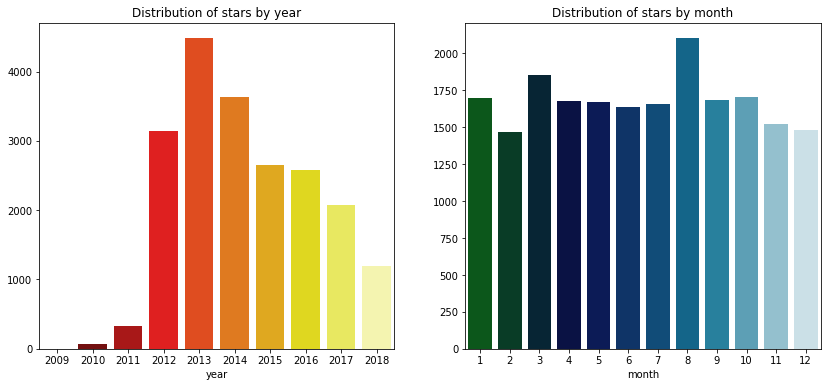

In [66]:
yelp_tip['date'] = pd.to_datetime(yelp_tip['date'])
yelp_tip['year'] = yelp_tip['date'].dt.year
yelp_tip['month'] = yelp_tip['date'].dt.month

f,ax = plt.subplots(1,2,figsize = (14,6))
ax1,ax2 = ax.flatten()
cnt  = yelp_tip.groupby('year').sum()['compliment_count'].to_frame()
sns.barplot(cnt.index,cnt['compliment_count'],palette='hot', ax = ax1)
ax1.set_title('Distribution of stars by year')
ax1.set_ylabel('')

cnt  = yelp_tip.groupby('month').sum()['compliment_count'].to_frame()
sns.barplot(cnt.index,cnt['compliment_count'],palette='ocean', ax = ax2)
ax2.set_title('Distribution of stars by month')
ax2.set_ylabel('')

### Merging Review and Buisness

In [67]:
yelp_rb = pd.merge(yelp_review,yelp_business, on = 'business_id', how = 'inner')
yelp_rb.head()

business_id cool                 date  funny  \
0  ujmEBvifdJM6h6RLv4wQIg    0  2013-05-07 04:34:36    1.0   
1  ujmEBvifdJM6h6RLv4wQIg    0  2015-08-19 16:39:53    2.0   
2  ujmEBvifdJM6h6RLv4wQIg    3  2013-08-04 10:55:04   10.0   
3  ujmEBvifdJM6h6RLv4wQIg    0  2015-11-19 06:39:58    0.0   
4  ujmEBvifdJM6h6RLv4wQIg    2  2016-02-12 09:49:59    3.0   

                review_id  stars_x  \
0  Q1sbwvVQXV2734tPgoKj4Q      1.0   
1  cG9ujooLXVLUn4O12_AdNA      5.0   
2  UoUPBrMsp8VGyf3_BBYB7w      1.0   
3  QGbPClwdlXukXBiLoqTGdg      1.0   
4  lX7DungpVlbJh9r5xHmZ6Q      4.0   

                                                text  useful  \
0  Total bill for this horrible service? Over $8G...     6.0   
1  Don't get sick. But if you do, come here.\r\r\...     4.0   
2  Must knows for this TRULY MAGICAL healthcare f...    12.0   
3  On November 17 my grandmother fell ill and we ...    15.0   
4  Walking in here. I thought I'd end up waiting ...     4.0   

                  user_id CustomerEXP  ...  \
0  hG7b0MtEbXx5QzbzE6C_VA         Bad  ...   
1  46TNf-5T5EcNFRJPYv_nrw        Good  ...   
2  56iEnLi8jR--2ranjPSQ4w         Bad  ...   
3  MJYkCvxASq9GKEXDrmhB0Q         Bad  ...   
4  PgjzouAp8FyOwh6J83D4rA        Good  ...   

                                               hours is_open   latitude  \
0  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...       1  36.215546   
1  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...       1  36.215546   
2  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...       1  36.215546   
3  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...       1  36.215546   
4  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...       1  36.215546   

    longitude                   name  postal_code  review_count  stars_y  \
0 -115.248798  MountainView Hospital        89128           238      2.5   
1 -115.248798  MountainView Hospital        89128           238      2.5   
2 -115.248798  MountainView Hospital        89128           238      2.5   
3 -115.248798  MountainView Hospital        89128           238      2.5   
4 -115.248798  MountainView Hospital        89128           238      2.5   

  state cat_desc  
0    NV  Fitness  
1    NV  Fitness  
2    NV  Fitness  
3    NV  Fitness  
4    NV  Fitness  

[5 rows x 24 columns]

#### Null value calculation for the merged data set

In [68]:
yelp_rb.isnull().sum()

business_id         0
cool                0
date                0
funny               0
review_id           0
stars_x             0
text                1
useful              2
user_id             2
CustomerEXP         0
address         12592
attributes      42699
categories          0
city                1
hours           67438
is_open             0
latitude            0
longitude           0
name                0
postal_code      1039
review_count        0
stars_y             0
state               0
cat_desc            0
dtype: int64

#### Top 5 Business Category WordCloud

In [69]:
restaurant = yelp_rb[yelp_rb['cat_desc'] == 'Restaurant']
service = yelp_rb[yelp_rb['cat_desc'] == 'Service']
shopping = yelp_rb[yelp_rb['cat_desc'] == 'Shopping']
medical = yelp_rb[yelp_rb['cat_desc'] == 'Medical']
fitness = yelp_rb[yelp_rb['cat_desc'] == 'Fitness']

In [70]:
restaurant_docs = restaurant['text'].str.lower().str.replace('[^A-Za-z ]','')
service_docs = service['text'].str.lower().str.replace('[^A-Za-z ]','')
shopping_docs = shopping['text'].str.lower().str.replace('[^A-Za-z ]','')
medical_docs = medical['text'].str.lower().str.replace('[^A-Za-z ]','')
fitness_docs = fitness['text'].str.lower().str.replace('[^A-Za-z ]','')

In [71]:
service_ndocs=[]
for i in service_docs:
    temp = str(i)
    if temp.isalnum():
        print(i)
    else:
        service_ndocs.append(i)

service_ndocs=pd.Series(service_ndocs)

httpwwwazcentralcomnewsarticleschandlermoverssuedjudgmenthtml
nan
httpwwwazcentralcomnewsarticleschandlermoverssuedjudgmenthtml
httpwwwazfamilycomnewsconsumerphoenixfamilyclaimoutrageovercarpetcleaningbaitandswitchhtmlhttpwwwbbborgcentralnorthernwesternarizonabusinessreviewscarpetandrugcleanersprocarecarpetairductcleaningofarizonaincintempeaz


In [72]:
restaurant_clean = restaurant_docs.apply(clean_sentence)

In [73]:
service_clean = service_ndocs.apply(clean_sentence)

In [74]:
service_new = service_clean

In [75]:
shopping_clean = shopping_docs.apply(clean_sentence)

In [76]:
medical_clean = medical_docs.apply(clean_sentence)

In [77]:
fitness_clean = fitness_docs.apply(clean_sentence)

#### Restaurant WordCloud

In [78]:
restaurant_para = str(restaurant_clean)

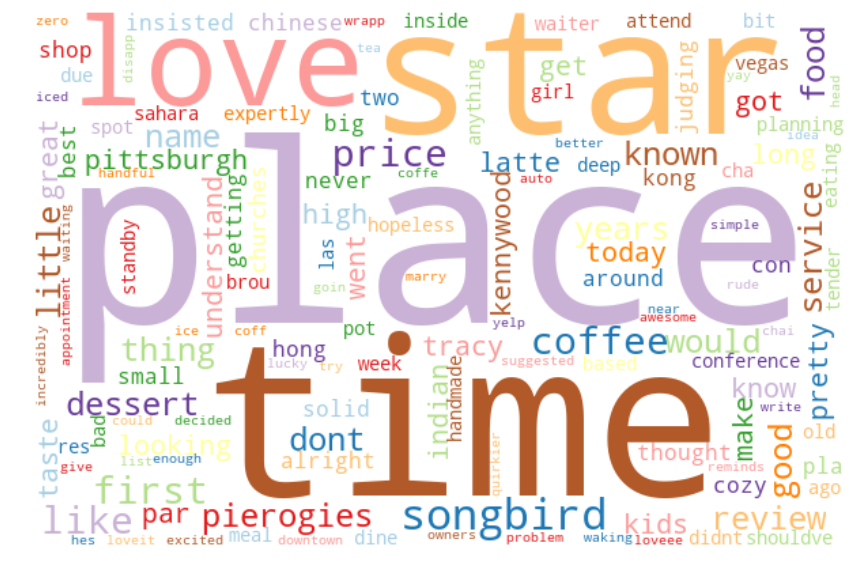

In [79]:
wordcloud_rest = WordCloud(background_color = 'white', colormap = "Paired", 
                           width = 300, height = 200, scale=2, 
                           max_words=1000, stopwords=stopwords).generate(restaurant_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_rest, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()

#### Service WordCloud

In [80]:
service_para = str(service_clean)

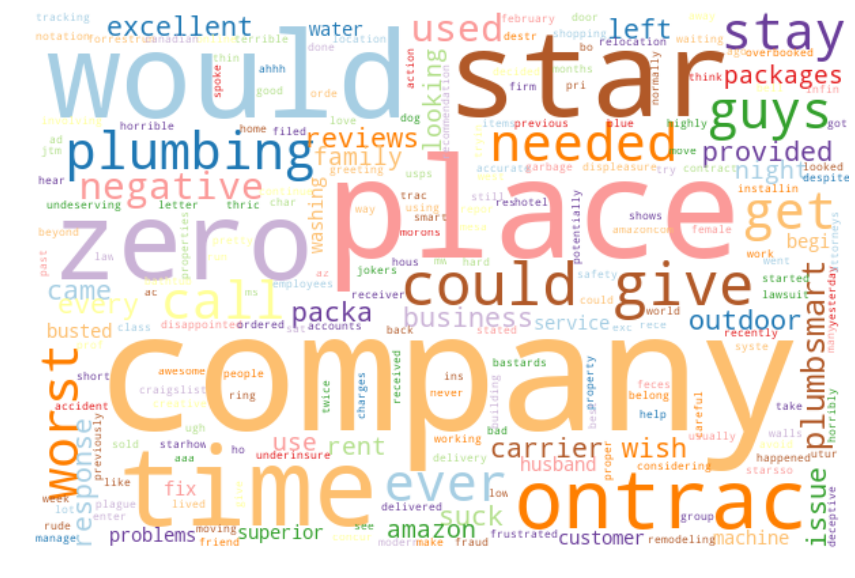

In [81]:
wordcloud_serv = WordCloud(background_color = 'white', colormap = "Paired", 
                           width = 300, height = 200, scale=2, 
                           max_words=1000, stopwords=stopwords).generate(service_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_serv, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()

#### Shopping WordCloud

In [82]:
shopping_para = str(shopping_clean)

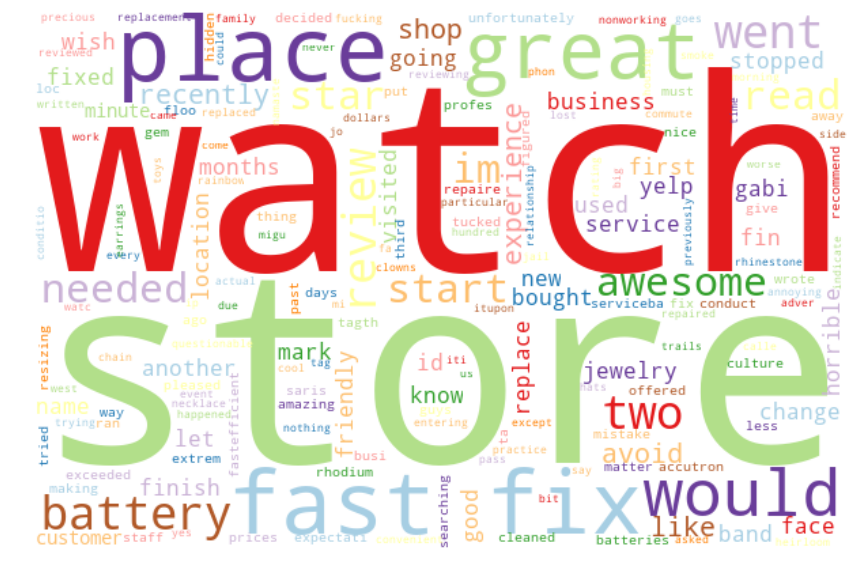

In [83]:
wordcloud_shop = WordCloud(background_color = 'white', colormap = "Paired", 
                           width = 300, height = 200, scale=2, 
                           max_words=1000, stopwords=stopwords).generate(shopping_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_shop, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()

#### Medical WordCloud

In [84]:
medical_para = str(medical_clean)

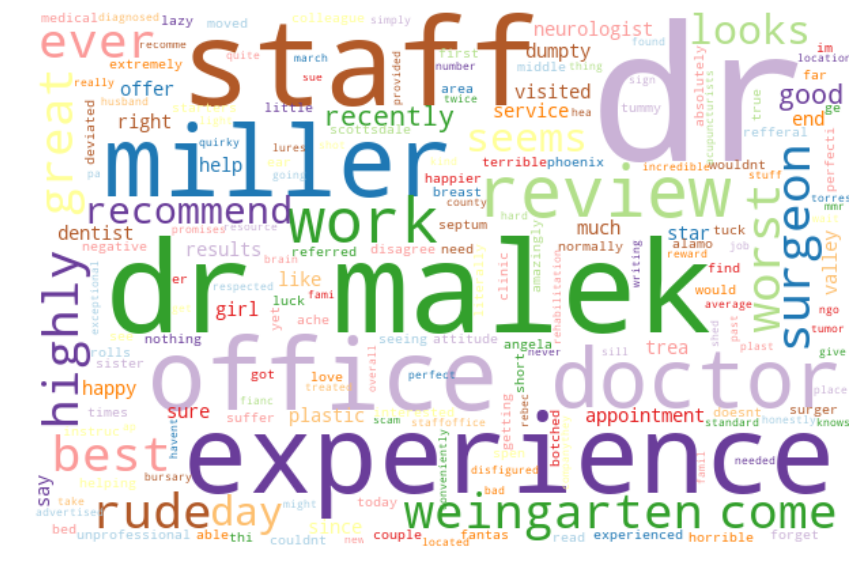

In [85]:
wordcloud_med = WordCloud(background_color = 'white', colormap = "Paired", 
                           width = 300, height = 200, scale=2, 
                           max_words=1000, stopwords=stopwords).generate(medical_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_med, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()

#### Fitness WordCloud

In [86]:
fitness_para = str(fitness_clean)

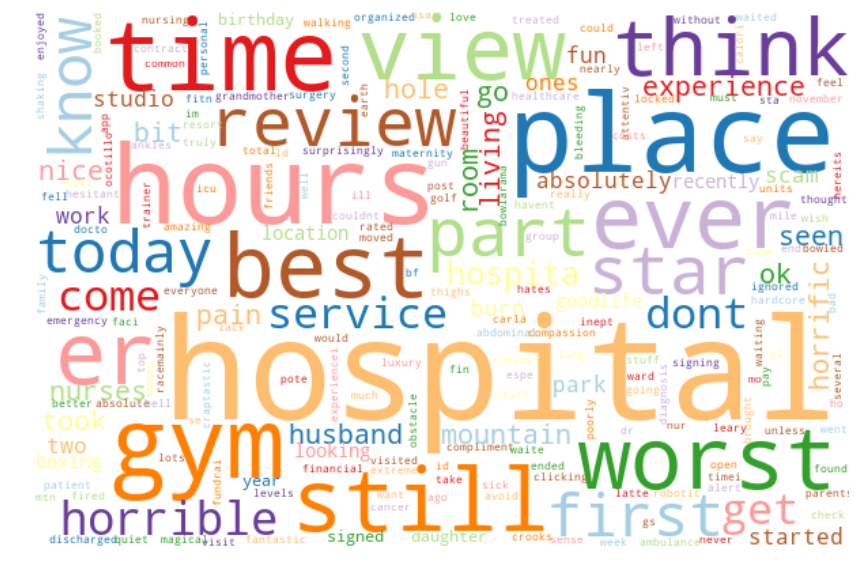

In [87]:
wordcloud_fit = WordCloud(background_color = 'white', colormap = "Paired", 
                           width = 300, height = 200, scale=2, 
                           max_words=1000, stopwords=stopwords).generate(fitness_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_fit, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()

#### Top 5 Buisness Category WordCloud with CustomerExperience

### Restaurant

In [88]:
restaurant_good = restaurant[restaurant['CustomerEXP']== 'Good']
restaurant_bad = restaurant[restaurant['CustomerEXP']== 'Bad']
restaurant_neu = restaurant[restaurant['CustomerEXP']== 'Neutral']

In [89]:
restaurant_good_docs = restaurant_good['text'].str.lower().str.replace('[^A-Za-z ]','')
restaurant_bad_docs = restaurant_bad['text'].str.lower().str.replace('[^A-Za-z ]','')
restaurant_neu_docs = restaurant_neu['text'].str.lower().str.replace('[^A-Za-z ]','')

#### Good,Bad,Neutral Review Text Cleaning

In [90]:
restaurant_good_clean = restaurant_good_docs.apply(clean_sentence)

In [91]:
restaurant_bad_clean = restaurant_bad_docs.apply(clean_sentence)

In [92]:
restaurant_neu_clean = restaurant_neu_docs.apply(clean_sentence)

In [93]:
restaurant_good_para = (str(restaurant_good_clean))
restaurant_bad_para = (str(restaurant_bad_clean))
restaurant_new_para = (str(restaurant_neu_clean))

#### Good Reviews WordCloud

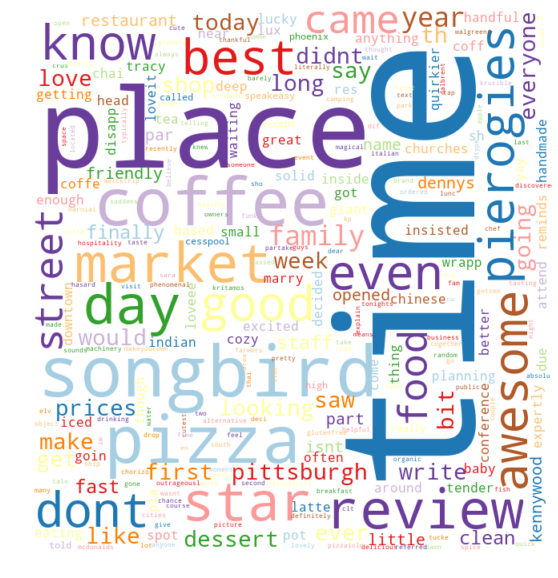

In [94]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(restaurant_good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("restaurant_good_cleanpara.png")

#### Bad Reviews WordCloud

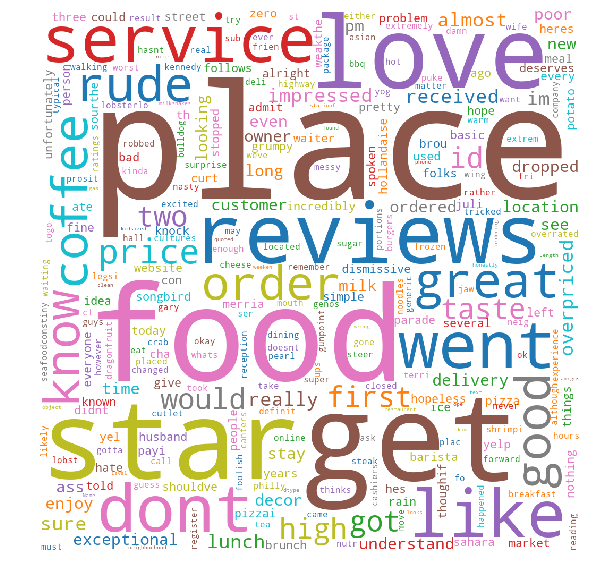

In [95]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(restaurant_bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('bad.png')

#### Netural Reviews WordCloud

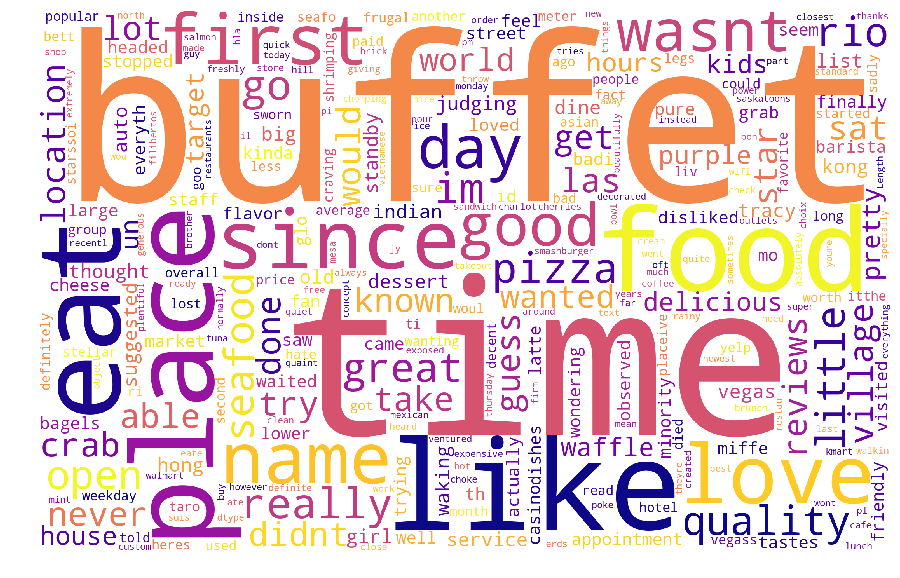

In [96]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(restaurant_new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('neu.png')

### Service

In [97]:
service_good = service[service['CustomerEXP']== 'Good']
service_bad = service[service['CustomerEXP']== 'Bad']
service_neu = service[service['CustomerEXP']== 'Neutral']

In [98]:
service_good_docs = service_good['text'].str.lower().str.replace('[^A-Za-z ]','')
service_bad_docs = service_bad['text'].str.lower().str.replace('[^A-Za-z ]','')
service_neu_docs = service_neu['text'].str.lower().str.replace('[^A-Za-z ]','')

In [99]:
service_bad_ndocs=[]
for i in service_bad_docs:
    temp = str(i)
    if temp.isalnum():
        print(i)
    else:
        service_bad_ndocs.append(i)

service_bad_ndocs=pd.Series(service_bad_ndocs)

httpwwwazcentralcomnewsarticleschandlermoverssuedjudgmenthtml
nan
httpwwwazcentralcomnewsarticleschandlermoverssuedjudgmenthtml
httpwwwazfamilycomnewsconsumerphoenixfamilyclaimoutrageovercarpetcleaningbaitandswitchhtmlhttpwwwbbborgcentralnorthernwesternarizonabusinessreviewscarpetandrugcleanersprocarecarpetairductcleaningofarizonaincintempeaz


#### Good,Bad,Neutral Review Text Cleaning

In [100]:
service_good_clean = service_good_docs.apply(clean_sentence)

In [101]:
service_bad_clean = service_bad_ndocs.apply(clean_sentence)

In [102]:
service_neu_clean = service_neu_docs.apply(clean_sentence)

In [103]:
service_good_para = (str(service_good_clean))
service_bad_para = (str(service_bad_clean))
service_new_para = (str(service_neu_clean))

#### Good Reviews WordCloud

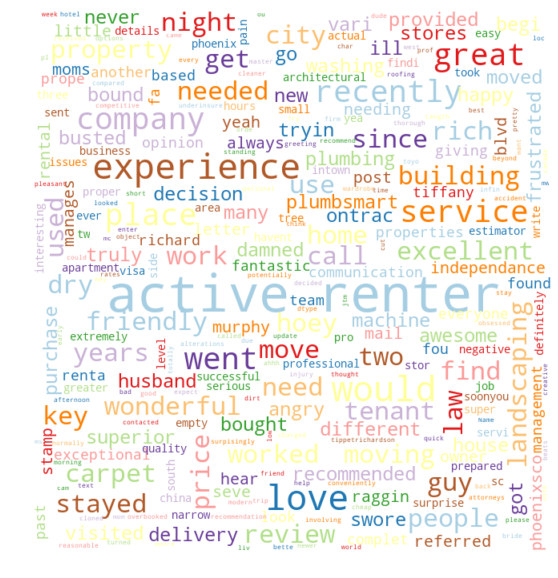

In [104]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(service_good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("restaurant_good_cleanpara.png")

#### Bad Reviews WordCloud

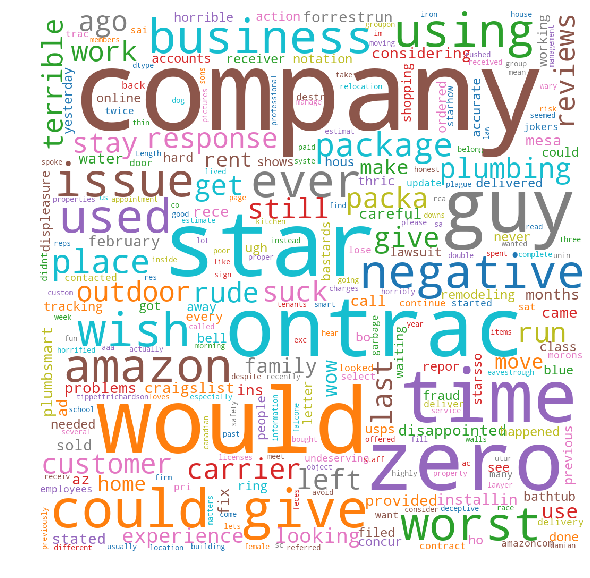

In [105]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(service_bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('bad.png')

#### Netural Reviews WordCloud

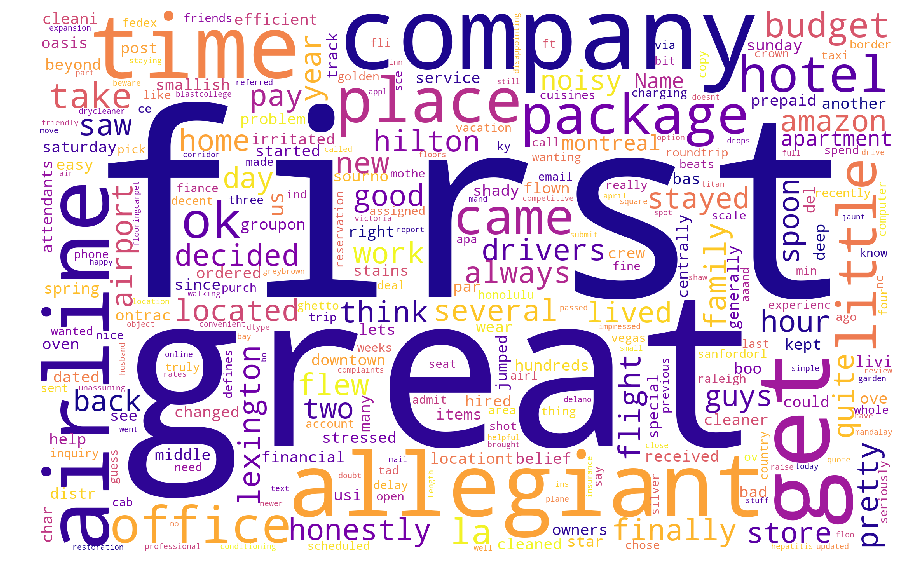

In [106]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(service_new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('neu.png')

### Shopping

In [107]:
shopping_good = shopping[shopping['CustomerEXP']== 'Good']
shopping_bad = shopping[shopping['CustomerEXP']== 'Bad']
shopping_neu = shopping[shopping['CustomerEXP']== 'Neutral']

In [108]:
shopping_good_docs = shopping_good['text'].str.lower().str.replace('[^A-Za-z ]','')
shopping_bad_docs = shopping_bad['text'].str.lower().str.replace('[^A-Za-z ]','')
shopping_neu_docs = shopping_neu['text'].str.lower().str.replace('[^A-Za-z ]','')

#### Good,Bad,Neutral Review Text Cleaning

In [109]:
shopping_good_clean = shopping_good_docs.apply(clean_sentence)

In [110]:
shopping_bad_clean = shopping_bad_docs.apply(clean_sentence)

In [111]:
shopping_neu_clean = shopping_neu_docs.apply(clean_sentence)

In [112]:
shopping_good_para = (str(shopping_good_clean))
shopping_bad_para = (str(shopping_bad_clean))
shopping_new_para = (str(shopping_neu_clean))

#### Good Reviews WordCloud

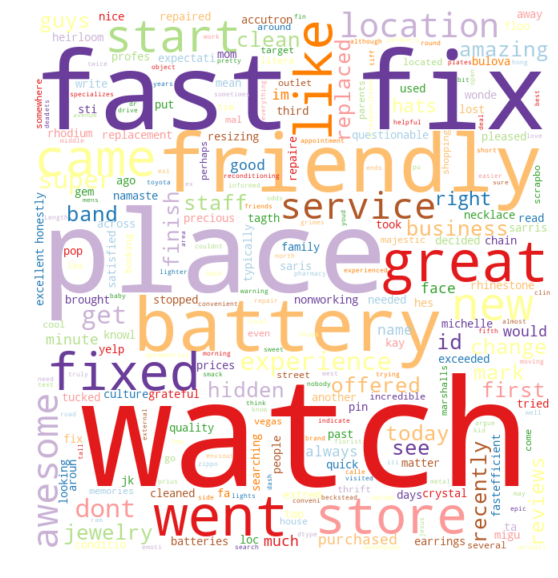

In [113]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(shopping_good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("shopping_good_cleanpara.png")

#### Bad Reviews WordCloud

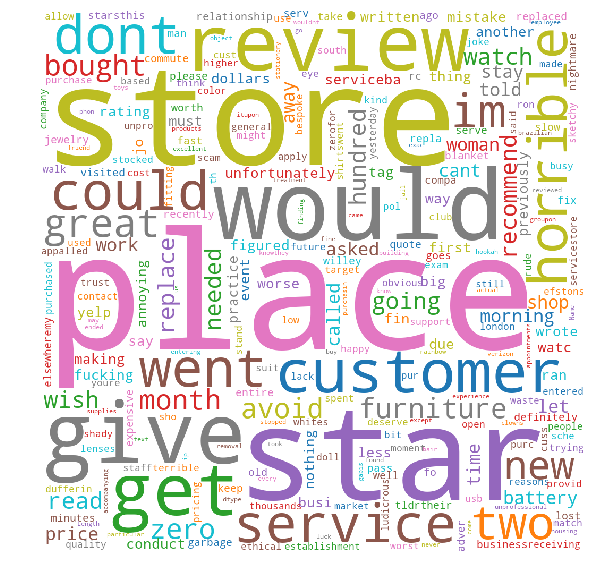

In [114]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(shopping_bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('bad.png')

#### Netural Reviews WordCloud

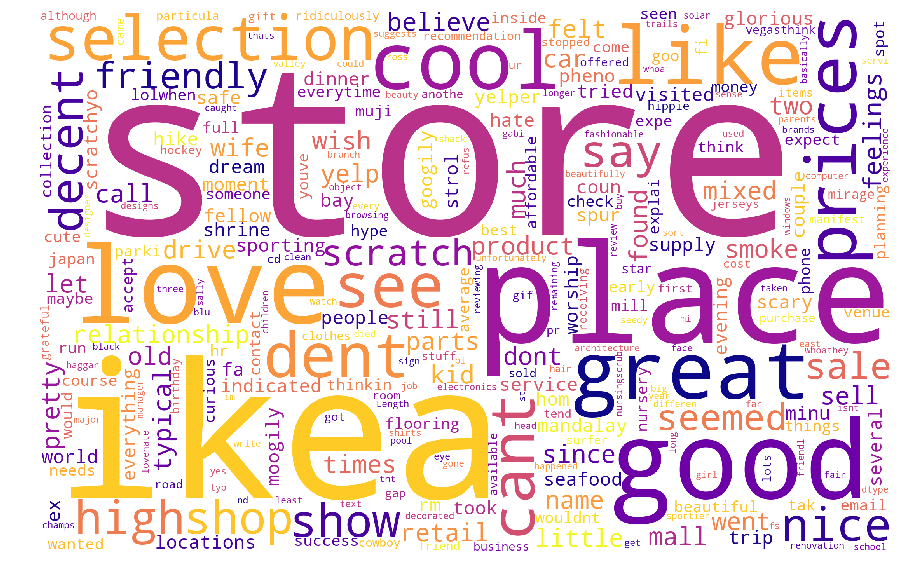

In [115]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(shopping_new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('neu.png')

### Medical

In [116]:
medical_good = medical[medical['CustomerEXP']== 'Good']
medical_bad = medical[medical['CustomerEXP']== 'Bad']
medical_neu = medical[medical['CustomerEXP']== 'Neutral']

In [117]:
medical_good_docs = medical_good['text'].str.lower().str.replace('[^A-Za-z ]','')
medical_bad_docs = medical_bad['text'].str.lower().str.replace('[^A-Za-z ]','')
medical_neu_docs = medical_neu['text'].str.lower().str.replace('[^A-Za-z ]','')

#### Good,Bad,Neutral Review Text Cleaning

In [118]:
medical_good_clean = medical_good_docs.apply(clean_sentence)

In [119]:
medical_bad_clean = medical_bad_docs.apply(clean_sentence)

In [120]:
medical_neu_clean = medical_neu_docs.apply(clean_sentence)

In [121]:
medical_good_para = (str(medical_good_clean))
medical_bad_para = (str(medical_bad_clean))
medical_new_para = (str(medical_neu_clean))

#### Good Reviews WordCloud

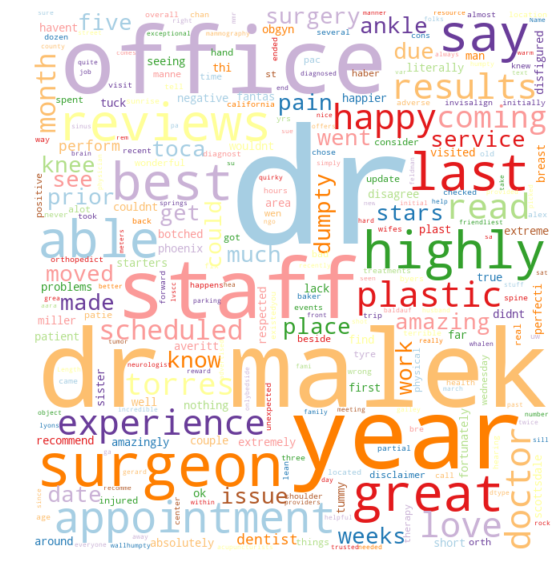

In [122]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(medical_good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("medical_good_cleanpara.png")

#### Bad Reviews WordCloud

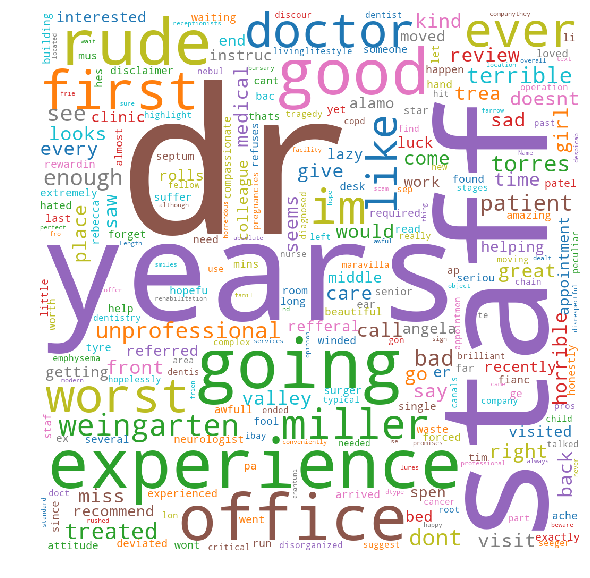

In [123]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(medical_bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('bad.png')

#### Netural Reviews WordCloud

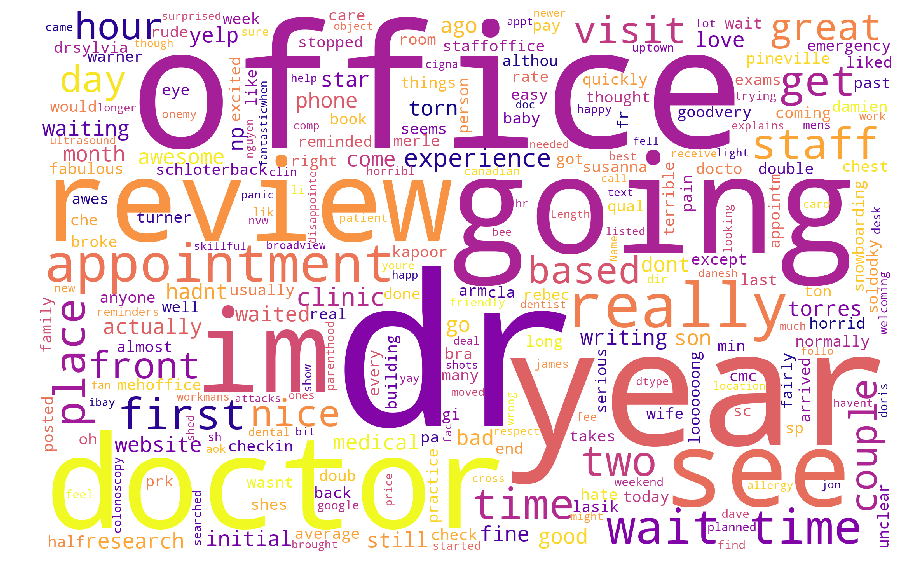

In [124]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(medical_new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('neu.png')

### Fitness

In [125]:
fitness_good = fitness[fitness['CustomerEXP']== 'Good']
fitness_bad = fitness[fitness['CustomerEXP']== 'Bad']
fitness_neu = fitness[fitness['CustomerEXP']== 'Neutral']

In [126]:
fitness_good_docs = fitness_good['text'].str.lower().str.replace('[^A-Za-z ]','')
fitness_bad_docs = fitness_bad['text'].str.lower().str.replace('[^A-Za-z ]','')
fitness_neu_docs = fitness_neu['text'].str.lower().str.replace('[^A-Za-z ]','')

#### Good,Bad,Neutral Review Text Cleaning

In [127]:
fitness_good_clean = fitness_good_docs.apply(clean_sentence)

In [128]:
fitness_bad_clean = fitness_bad_docs.apply(clean_sentence)

In [129]:
fitness_neu_clean = fitness_neu_docs.apply(clean_sentence)

In [130]:
fitness_good_para = (str(fitness_good_clean))
fitness_bad_para = (str(fitness_bad_clean))
fitness_new_para = (str(fitness_neu_clean))

#### Good Reviews WordCloud

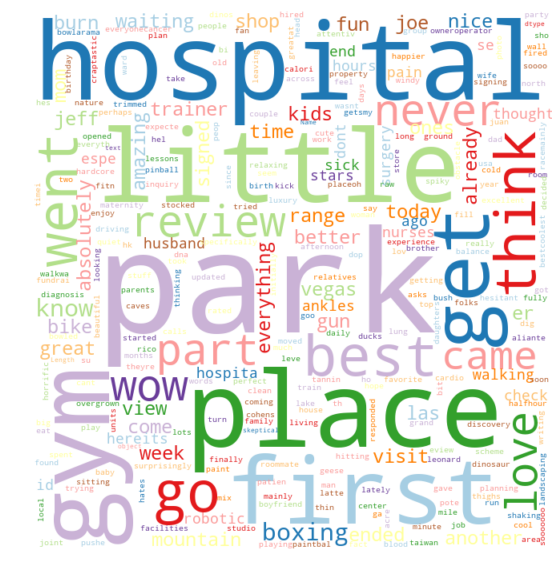

In [131]:
wordcloud_good = WordCloud(background_color = "white", colormap = "Paired",mask = thumbsup, 
                           width = 300, height = 200, scale=2,max_words=1000, 
                           stopwords=stopwords).generate(fitness_good_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_good, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_good.to_file("fitness_good_cleanpara.png")

#### Bad Reviews WordCloud

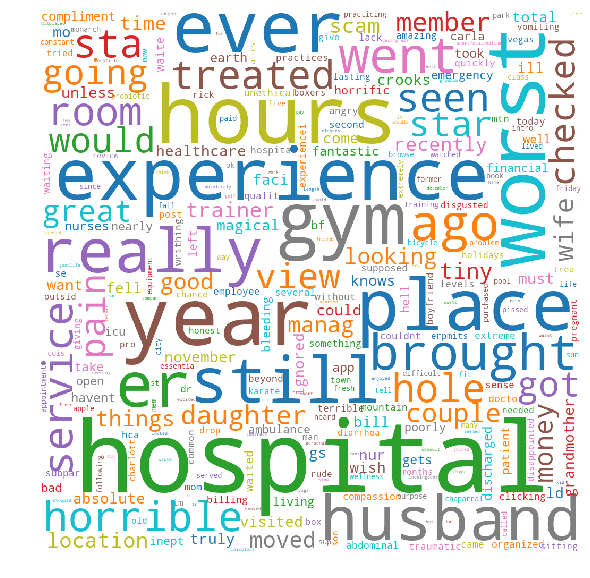

In [132]:
thumbsdown = np.array(Image.open(path.join(d,"thumbsdown.png")))
wordcloud_bad = WordCloud(background_color = 'white', colormap = 'tab10', mask = thumbsdown, 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(fitness_bad_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_bad,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_bad.to_file('bad.png')

#### Netural Reviews WordCloud

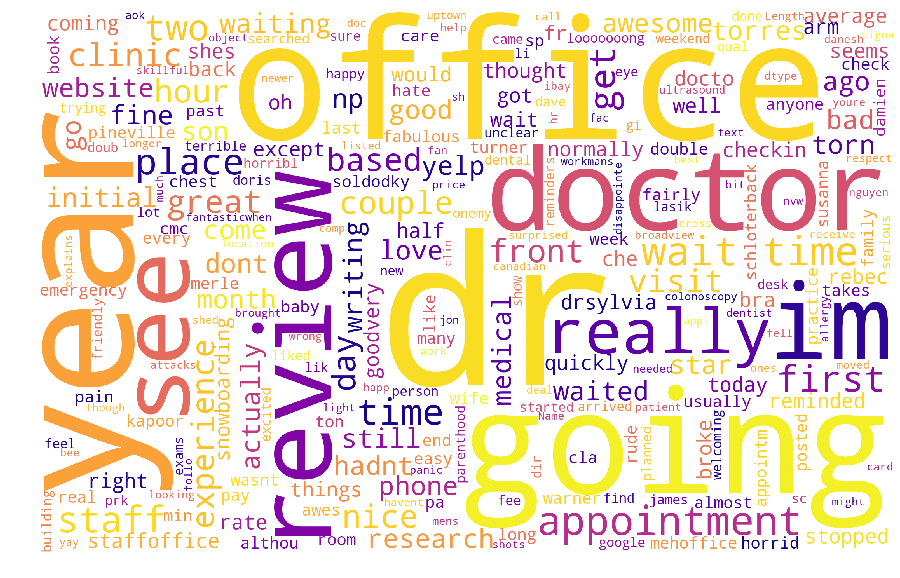

In [133]:
wordcloud_neu = WordCloud(background_color = 'white', colormap = "plasma", 
                          width = 1100, height = 700, scale=2,max_words=1000, 
                          stopwords=stopwords).generate(medical_new_para)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud_neu,cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_neu.to_file('neu.png')

### Merging Review and Users

In [134]:
yelp_ru = pd.merge(yelp_review,yelp_users, on = 'user_id', how = 'left')
yelp_ru.head()

business_id cool_x                 date  funny_x  \
0  ujmEBvifdJM6h6RLv4wQIg      0  2013-05-07 04:34:36      1.0   
1  b1b1eb3uo-w561D0ZfCEiQ      0  2018-01-30 23:07:38      0.0   
2  3fw2X5bZYeW9xCz_zGhOHg      5  2016-05-07 01:21:02      4.0   
3  Mem13A3C202RzT53npn4NA      9  2017-05-13 10:41:43      6.0   
4  FQ1wBQb3aNeRMThSQEV0Qg      0  2013-12-07 02:32:45      0.0   

                review_id  stars  \
0  Q1sbwvVQXV2734tPgoKj4Q    1.0   
1  11a8sVPMUFtaC7_ABRkmtw    1.0   
2  G7XHMxG0bx9oBJNECG4IFg    3.0   
3  IPw8yWiyqnfBzzWmypUHgg    5.0   
4  I9HBDyzCqLhTYHCAZIFZQQ    5.0   

                                                text  useful_x  \
0  Total bill for this horrible service? Over $8G...       6.0   
1  Today was my second out of three sessions I ha...       7.0   
2  Tracy dessert had a big name in Hong Kong and ...       5.0   
3  If you are looking for the best pierogies in P...       9.0   
4  PlumbSmart provided superior service from begi...       4.0   

                  user_id CustomerEXP  ...  compliment_writer  cool_y  \
0  hG7b0MtEbXx5QzbzE6C_VA         Bad  ...                0.0     0.0   
1  ssoyf2_x0EQMed6fgHeMyQ         Bad  ...                0.0     0.0   
2  jlu4CztcSxrKx56ba1a5AQ     Neutral  ...               79.0  4067.0   
3  5JVY32_bmTBfIGpCCsnAfw        Good  ...               33.0  1662.0   
4  vXZeHaLvdfCPATz5BDavow        Good  ...                0.0     1.0   

                      elite  fans  \
0                       NaN   0.0   
1                       NaN   0.0   
2       2015,2016,2017,2018  83.0   
3  2014,2015,2016,2017,2018  46.0   
4                       NaN   0.0   

                                             friends  funny_y      name  \
0                             frQs7y5qa-X1pvAM0sJe1w      4.0    Stefan   
1  jrw1jRpoRgK6ZQ4Z5_hPng, GJgchmwqQghjuG14uWgIOA...      0.0    Reilly   
2  QAAWz02cj67-ndc1qqiS4g, vh9gbtiOgTgwTGAXBXWkXw...   2302.0    Kristy   
3  1snscCfFZOtDIRxw30qTOA, ahBUJmFUedHoFfgtcfzqSA...    498.0  Kimberly   
4                             woAZ9KVLIrzCHCv6dzQw3g      7.0     Scott   

   review_count  useful_y        yelping_since  
0          10.0      18.0  2008-07-10 17:24:47  
1           2.0       7.0  2016-12-06 22:12:48  
2         600.0    4346.0  2015-06-18 22:57:20  
3         776.0    1664.0  2013-03-22 16:30:47  
4           7.0      25.0  2011-09-19 17:46:00  

[5 rows x 31 columns]

#### Null value calculation for the merged data set

In [135]:
yelp_ru.isnull().sum()

business_id                0
cool_x                     0
date                       2
funny_x                    2
review_id                  2
stars                      2
text                       3
useful_x                   4
user_id                    4
CustomerEXP                0
average_stars              4
compliment_cool            4
compliment_cute            4
compliment_funny           4
compliment_hot             4
compliment_list            4
compliment_more            4
compliment_note            4
compliment_photos          4
compliment_plain           4
compliment_profile         4
compliment_writer          4
cool_y                     4
elite                 330370
fans                       4
friends                    4
funny_y                    4
name                       4
review_count               4
useful_y                   4
yelping_since              4
dtype: int64

In [136]:
yelp_ru.dropna(axis = 1, inplace = True)